In [1]:
import numpy as np
import yt 
from yt.units import *
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

In [2]:
foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0042"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap

In [3]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name = track_dir + 'halo_c_v', disk_relative = False,
                             do_filter_particles = False, masses_dir = track_dir)

Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0042/RD0042


yt : [INFO     ] 2023-06-16 15:08:17,581 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2023-06-16 15:08:17,582 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-16 15:08:17,583 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-16 15:08:17,583 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-16 15:08:17,584 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-16 15:08:17,585 Parameters: current_redshift          = 0
yt : [INFO     ] 2023-06-16 15:08:17,585 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-16 15:08:17,586 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-16 15:08:17,586 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-06-16 15:08:17,587 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9


Parsing Hierarchy : 100%|█████████████████| 4251/4251 [00:00<00:00, 7407.54it/s]
yt : [INFO     ] 2023-06-16 15:08:18,399 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


In [4]:
#Code for radial density plot 
ad = ds.all_data()
metallicity = ad["gas","metallicity"] #units in Zsun
radius = ad["gas","radius_corrected"] #units in kpc
print(type(radius))
import matplotlib.pyplot as plt

<class 'unyt.array.unyt_array'>


In [5]:
print(type(radius))
np.min(radius)
M = np.sort(metallicity)
R = np.sort(radius)
print(M)
print(metallicity)
print(radius)
print(R)

sort = np.argsort(radius)
print(metallicity[sort])
print(radius[sort])

<class 'unyt.array.unyt_array'>
[3.71381748e-09 3.74072302e-09 3.74771579e-09 ... 1.62149740e+01
 1.62305108e+01 1.64791923e+01] Zsun
[7.72200772e-09 7.72200772e-09 7.72200772e-09 ... 8.64479267e-02
 5.65926587e-02 5.16668134e-02] Zsun
[121740.92322868 121404.56933027 121069.8902336  ...   1400.31038161
   1401.10414008   1401.89830873] kpc
[1.45519152e-11 2.74438652e-01 2.74438652e-01 ... 1.27849838e+05
 1.27850219e+05 1.28169659e+05] kpc
[1.94772782e+00 1.91505751e+00 1.94911470e+00 ... 7.72200772e-09
 7.72200772e-09 7.72200772e-09] Zsun
[1.45519152e-11 2.74438652e-01 2.74438652e-01 ... 1.27849838e+05
 1.27850219e+05 1.28169659e+05] kpc


In [6]:
max_radius = 20 # kpc
new_radius2 = np.array(radius)[radius<max_radius]
new_metallicity = np.array(metallicity)[radius < max_radius]
print(len(new_radius2))
print(new_radius2)

851333
[15.9198075  15.8795431  15.84393072 ... 19.9888575  19.99074137
 19.99639194]


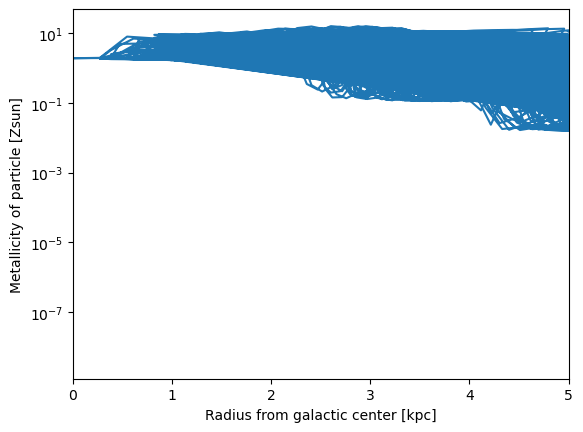

In [7]:
plt.plot(radius, metallicity)
plt.xlabel("Radius from galactic center [kpc]")
plt.ylabel("Metallicity of particle [Zsun]")
plt.xlim([0, 5])
plt.yscale("log")  
plt.show()


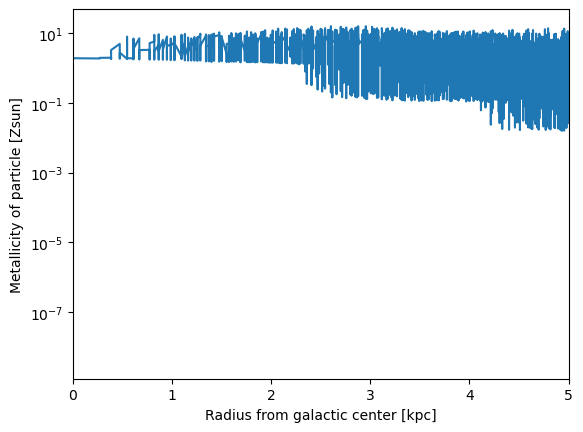

In [8]:
plt.plot(radius[sort], metallicity[sort])
plt.xlabel("Radius from galactic center [kpc]")
plt.ylabel("Metallicity of particle [Zsun]")
plt.xlim([0, 5])
plt.yscale("log")  
plt.show()


(0.0, 20.0)

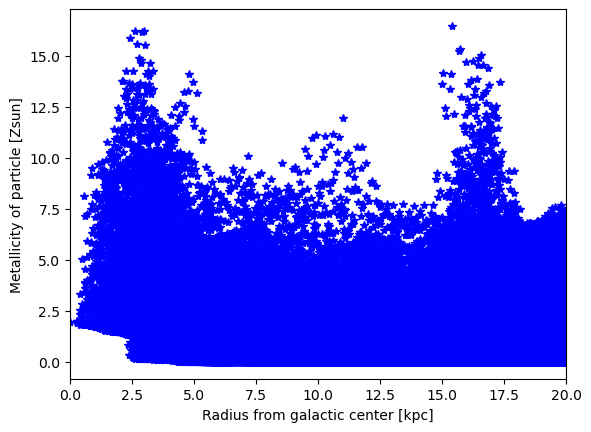

In [9]:
#unyt array = np array but with built-in unit? 
from scipy.signal import find_peaks
#peaks, _ = find_peaks(metallicity)
plt.plot(radius, metallicity, 'b*')
#plt.plot(peaks, metallicity[peaks], "x")
plt.xlabel("Radius from galactic center [kpc]")
plt.ylabel("Metallicity of particle [Zsun]")
plt.xlim([0, 20])

In [10]:
print(radius)

[121740.92322868 121404.56933027 121069.8902336  ...   1400.31038161
   1401.10414008   1401.89830873] kpc


array([ 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,
        4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,
        9.25,  9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25,
       13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75,
       18.25, 18.75, 19.25, 19.75])

Text(0, 0.5, 'Average Metallicity of particles [Zsun]')

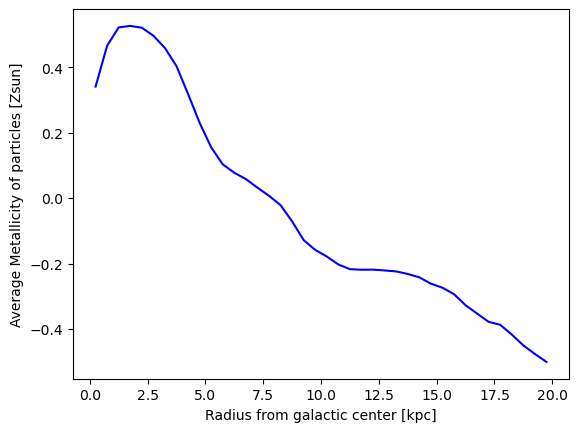

In [38]:
index = 0 

max_radius = 20 #actual maximum radius
min_radius = 0 #actual minimum radius 
increment = 0.5

#new_radius2 = np.array(radius[sort])[(min_radius < radius[sort]) & (radius[sort] < max_radius)]
#new_metallicity = np.array(metallicity[sort])[(min_radius < radius[sort]) & (radius[sort] < max_radius)]


metallicitylist = []

sorted_radius = radius[sort]
sorted_metallicity = metallicity[sort]

radiuslist = np.arange(min_radius, max_radius, increment) + increment/2

while index < len(radiuslist):
        left_edge = index*increment
        right_edge = left_edge + increment 
        new_metallicity = np.array(sorted_metallicity)[(left_edge < sorted_radius) & (sorted_radius < right_edge)]
        metallicitylist.append((np.mean(new_metallicity)))
        index +=1

plt.plot(radiuslist, np.log10(metallicitylist), 'b-')
#plt.yscale("log")  
plt.xlabel("Radius from galactic center [kpc]")
plt.ylabel("Average Metallicity of particles [log Zsun]")

#1. for loop 2. np.digitize

In [34]:
index = 0 

max_radius = 20 #actual maximum radius
min_radius = 0 #actual minimum radius 
increment = 1.25

while index < 40:
    left_edge = index*increment
    right_edge = left_edge + increment 
    index += 1 
    print(index,left_edge, right_edge)
    

1 0.0 1.25
2 1.25 2.5
3 2.5 3.75
4 3.75 5.0
5 5.0 6.25
6 6.25 7.5
7 7.5 8.75
8 8.75 10.0
9 10.0 11.25
10 11.25 12.5
11 12.5 13.75
12 13.75 15.0
13 15.0 16.25
14 16.25 17.5
15 17.5 18.75
16 18.75 20.0
17 20.0 21.25
18 21.25 22.5
19 22.5 23.75
20 23.75 25.0
21 25.0 26.25
22 26.25 27.5
23 27.5 28.75
24 28.75 30.0
25 30.0 31.25
26 31.25 32.5
27 32.5 33.75
28 33.75 35.0
29 35.0 36.25
30 36.25 37.5
31 37.5 38.75
32 38.75 40.0
33 40.0 41.25
34 41.25 42.5
35 42.5 43.75
36 43.75 45.0
37 45.0 46.25
38 46.25 47.5
39 47.5 48.75
40 48.75 50.0


In [ ]:
a = np.arange(0.25, 20, 0.5)
print(len(a))

In [ ]:

#place values into bins
np.digitize(radius[sort], bins=[0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20.], right=True)

print(radius[sort])
